In [0]:
#import numpy and pyplot
import numpy as np   
import matplotlib.pyplot as plt

In [2]:
#For importing files from google drive
from google.colab import drive

drive.mount('/content/drive')
%cd drive
%cd My Drive
%cd PClubProject/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive
/content/drive/My Drive
/content/drive/My Drive/PClubProject


In [0]:
#load data from csv file
my_data = np.genfromtxt('linear_data.csv', delimiter=',')

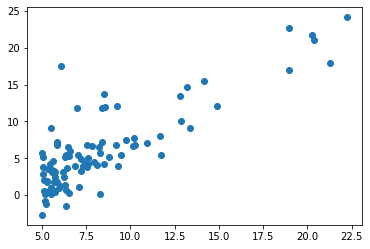

In [4]:
#plotting data to visualize it
#Split the data into input and output values
X = my_data[:,0]
y = my_data[:,1]
plt.scatter(X, y)
plt.show()
#m is the number of training examples
m = X.shape[0]

In [0]:
#Reshape X to form an array of shape (m,1) instead of a vector
b=X.reshape(-1,1)
#Insert a column of ones to for theta_0 in X 
new = np.ones((m,1))
X = np.append(new, b, axis=1)
#reshape y to form an array of shape (m,1)
y = y.reshape(-1,1)

In [0]:
#Function to initialize theta
#If no value is provided, initialize theta to 0
def init(theta0=0,theta1=1):
  #Create an array of shape (2,1) for theta
  theta = np.zeros((2,1))
  theta[0]=theta0
  theta[1]=theta1
  return theta


In [0]:
theta = init(0,0)

In [0]:
#Cost function definition
def cost(X,y,theta):
  h = X@theta
  #err is the error term
  err = h - y
  #Square the error term and take sum of errors in all training examples
  J = np.sum(np.square(err))
  J /= (2*m)
  return J

In [9]:
cost(X,y,theta)

32.072733877455676

In [0]:
#Gradient descent function
#alpha is the learning rate
#iter is the number of iterations
def gradientDesc(X,y,theta,alpha,iter):
  m = y.shape[0]
  #d represents the derivative term
  d = np.zeros((2,1))
  #Jdecrease stores the change in cost after every iteration
  Jdecrease = np.zeros(iter)
  for iter in range(iter):
    h = X@theta - y
    temp = h.T.dot(X)
    d = temp.T
    d/=m
    theta = theta - alpha*d
    
    Jdecrease[iter]=cost(X,y,theta)

  return theta,Jdecrease

In [0]:
theta,Jdecrease = gradientDesc(X,y,theta,0.015,1000)

array([[-3.63061572],
       [ 1.16639493]])

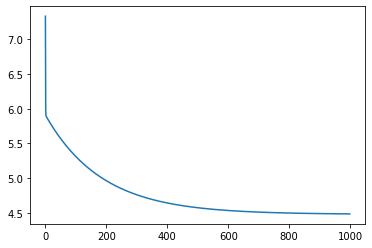

In [12]:
plt.plot(Jdecrease)
theta
#plotting cost as function of iterations to check whether it decreases or not

In [0]:
#prediction function for an input x
def pred(x,theta):
  pred = theta[0]+x*theta[1]
  return pred


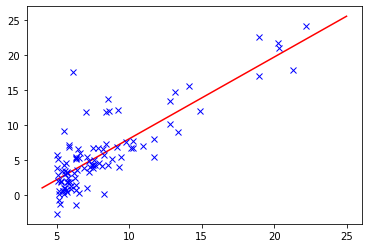

In [14]:
#plotting the line to finally check if value of theta is approx correct
x1 = np.linspace(4,25,100)
y1 = theta[0] + theta[1]*x1
plt.plot(x1, y1, '-r', label='y=2x+1')
x2 = my_data[:,0]
y2 = my_data[:,1]
plt.plot(x2, y2, 'bx', label='labels')

In [0]:
#load data from csv file
my_data = np.genfromtxt('logistic_data.csv', delimiter=',')

In [0]:
#Defining X and y, also inserting a column of ones
x1 = my_data[:,0]
x2 = my_data[:,1]
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x1_max = np.max(x1)
x2_max = np.max(x2)
x1 /=x1_max #Keeping values of training data between 0 and 1 to prevent divide by zero error in log
x2 /=x2_max
X = np.append(x1, x2, axis=1)
y = my_data[:,2]
y = y.reshape(-1,1)

#m is the number of training examples
m = my_data.shape[0]
new = np.ones((m,1))
X = np.append(new, X, axis=1)

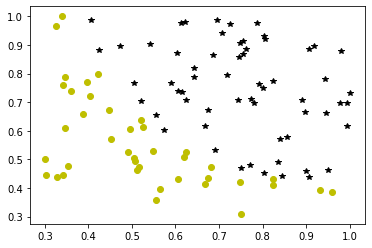

In [46]:
#plotting the data to visualize
pos = y == 1
neg = y == 0
plt.plot(x1[pos], x2[pos], 'k*')
plt.plot(x1[neg], x2[neg], 'yo')


In [0]:
#sigmoid function
def sigmoid(z):
  sigma = 1/(1+np.exp(-z))
  return sigma

In [0]:
#Function to initialize theta
#If no value is provided, initialize theta to 0
def init(theta0=0,theta1=0,theta2=0):
  #Create an array of shape (3,1) for theta
  theta = np.zeros((3,1))
  theta[0]=theta0
  theta[1]=theta1
  theta[2]=theta2
  return theta

theta = init()

In [0]:
#cost function
def cost(X,y,theta):
  m = y.shape[0]
  z = X@theta
  h = sigmoid(z)
  J = np.sum((y*np.log(h))+((1-y)*np.log(1-h)))
  J = -J/m
  return J

In [50]:
#cost with initial value of theta
cost(X,y,theta)

0.6931471805599453

In [0]:
#gradientdesc function
#alpha is the learning rate, iter is the number of iterations
def gradientDesc(X,y,theta,alpha,iter):
  m = y.shape[0]
  Jdecrease = np.zeros(iter)
  #d represents the derivative term
  d = np.zeros((3,1))
  for iter in range(iter):
    
    h = sigmoid(X@theta) - y
    temp = h.T.dot(X)

    d = temp.T
    d/=m
    theta = theta - alpha*d
    Jdecrease[iter]=cost(X,y,theta)

  return theta, Jdecrease

In [0]:
theta, Jdecrease = gradientDesc(X,y,theta,0.1,10000)

array([[-11.20759342],
       [  9.43918111],
       [  8.74793005]])

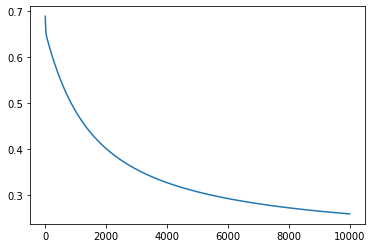

In [61]:
plt.plot(Jdecrease)
theta

In [0]:
#function which predicts probability 
def pred_prob(x1,x2,theta):
  h = theta[0] + theta[1]*x1 + theta[2]*x2
  return sigmoid(h)

In [0]:
#function to classify
def pred(x1,x2,theta):
  pred = pred_prob(x1,x2,theta)
  return int(pred>=0.5)

In [62]:
#Function to check accuracy
accuracy = 0.0
for i in range(X.shape[0]):
  prediction = pred(x1[i],x2[i],theta)
  accuracy += (prediction==y[i])
accuracy[0]/=m
accuracy[0]*=100
print(accuracy)


[90.]


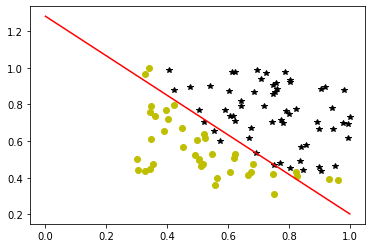

In [64]:
#plotting the line to finally check if value of theta is approx correct
pos = y == 1
neg = y == 0
plt.plot(x1[pos], x2[pos], 'k*')
plt.plot(x1[neg], x2[neg], 'yo')
x3 = np.linspace(0,1,100)
y3 = -(theta[0] + theta[1]*x3)/theta[2]
plt.plot(x3, y3, '-r')
